In [2]:
# Importeren van de nodige packages
# Vul zelf aan met extra packages als dit nodig is voor de oefeningen!
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Testen

### 6. Two-Sample T-Test (The t-test for independent samples): 

- Gebruik deze test wanneer je twee **onafhankelijke groepen** vergelijkt (De groepen moeten **niet gerelateerd** zijn aan elkaar; bijvoorbeeld, mannen versus vrouwen, of mensen die een nieuw medicijn nemen versus mensen die een placebo nemen.).

### 7. Paired T-Test (The t-test for paired samples): 

- Gebruik deze test wanneer je twee gerelateerde metingen vergelijkt, bijvoorbeeld bij dezelfde proefpersonen voor en na een interventie (Gebruik deze test wanneer je de gemiddelden van twee **gerelateerde** groepen wilt vergelijken. Dit gebeurt meestal wanneer de metingen voor en na een bepaalde interventie worden gedaan, of wanneer de gegevens paargewijs gerelateerd zijn, zoals metingen van dezelfde proefpersonen onder verschillende omstandigheden.).

#### Onafhankelijke vs afhankelijke variabelen

- Onafhankelijke variabele: Dit is de variabele die wordt gemanipuleerd of waarvan de invloed wordt onderzocht.
- Afhankelijke variabele: Dit is de variabele die wordt gemeten of geobserveerd om te zien of deze wordt beïnvloed door de onafhankelijke variabele.

#### Voorbeeldvragen

- Zijn mannelijke pinguïns groter dan vrouwelijke pinguïns?: 
    - Onafhankelijke variabele: Geslacht van de pinguïn (mannelijk/vrouwelijk)
    - Afhankelijke variabele: Grootte van de pinguïn
    - Test: Two-sample t-test.
        - Waarom: Je vergelijkt de gemiddelde grootte van twee onafhankelijke groepen (mannelijke en vrouwelijke pinguïns).

- Krijgen mannen een hoger salaris dan vrouwen?
    - Onafhankelijke variabele: Geslacht (man/vrouw)
    - Afhankelijke variabele: Salaris
    - Test: Two-sample t-test.
        - Waarom: Je vergelijkt de gemiddelde salarissen tussen twee onafhankelijke groepen (mannen en vrouwen).

- Beschermt een nieuw vaccin tegen een ziekte?
    - Onafhankelijke variabele: Toediening van het vaccin (ja/nee)
    - Afhankelijke variabele: Bescherming tegen de ziekte (wel/niet geïnfecteerd)
    - Test: Paired t-test (in een specifieke context).
        - Waarom: Als je bijvoorbeeld dezelfde groep mensen voor en na vaccinatie test om te zien of hun immuniteit is verbeterd, dan vergelijk je gepaarde gegevens (voor en na de vaccinatie). Als het echter om twee onafhankelijke groepen gaat (gevaccineerd vs. niet-gevaccineerd), zou je een two-sample t-test gebruiken.

- Verbetert “retrieval practice” de leerresultaten (d.w.z. de cijfers van studenten)?
    - Onafhankelijke variabele: Gebruik van “retrieval practice” (ja/nee)
    - Afhankelijke variabele: Leerresultaten (cijfers van studenten)
    - Test: Paired t-test.
        - Waarom: Als je dezelfde groep studenten test voor en na het toepassen van “retrieval practice”, dan werk je met gepaarde gegevens (resultaten voor en na de interventie).

----

## Question 6 -> paired t-test (The t-test for paired samples)

The sample given below contains measurement results of a variable Temperature at two time points (`time1` and `time2`). We want to know whether the measurements at the second time point are significantly different from those at the first time point.

Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What statistical test should you use to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis.
4. Calculate the p-value.
5. Draw a conclusion based on the previous step and formulate an answer to the research question.
6. Give for the observations at time `time1`:
    1. The interquartile range
    2. The kurtosis
    3. The range
    4. The standard deviation

In [2]:
temperatures = pd.DataFrame(data={
  'time1': [65, 87, 59, 71, 58, 74, 55, 98, 62, 53, 84, 63, 78, 62, 60],
  'time2': [82, 91, 86, 83, 85, 51, 65, 61, 76, 65, 53, 70, 51, 55, 68]
})
temperatures.head()

,time1,time2
0,65,82
1,87,91
2,59,86
3,71,83
4,58,85


p-value is 0.8744
Inter Quartile Range: 16.5
Kurtosis:            0.15796776764037945
Range :    45
Standard deviation:  13.09743704481366


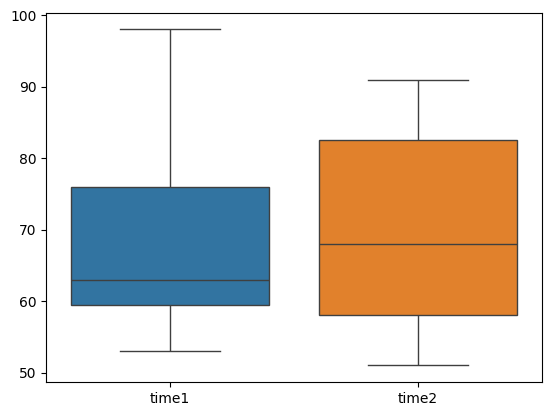

In [3]:
#1
sns.boxplot(data = temperatures)
#2  paired samples

#4
statistic, pvalue = stats.ttest_rel(temperatures['time1'], temperatures['time2'], alternative='two-sided')
print("p-value is %.4f" % pvalue)

#5 p-value >  5% => er is niet voldoende bewijs om de H0 te verwerpen
#the measurements at the second time point are not significantly different from those at the first time point.

#6
#The interquartile range
print("Inter Quartile Range:", temperatures['time1'].quantile(.75) - temperatures['time1'].quantile(.25))
#The kurtosis
print(f"Kurtosis:            {temperatures['time1'].kurtosis()}")
#The range
print(f"Range :    {temperatures['time1'].max() - temperatures['time1'].min()}")
#The standard deviation
print(f"Standard deviation:  {temperatures['time1'].std()}") # Pay attention: n-1 in the denominator

## Answers Question 6


1. sns.boxplot(data = temperatures)
2. paired samples (paired t-test)
3. The hypotheses are:
- $H_0$: $\mu_1 - \mu_2 = 0$ (the temperature in both groups is the same)
- $H_1$: $\mu_1 - \mu_2 <> 0$ (the temperature in group 1 is not the same as the temp in group 2)
4. p-value is 0.8744
5. #5 p-value >  5% => er is niet voldoende bewijs om de H0 te verwerpen
6. 
   1. Inter Quartile Range: 16.5
   2. Kurtosis:            0.15796776764037945
   3. Range :    45
   4. Standard deviation:  13.09743704481366

----

## Vraag 7 [7 pt] -> two-sample t-test (The t-test for independent samples)

Er werd een onderzoek gevoerd naar de hoeveelheid moedermelk die geproduceerd werd bij moeders die wel of niet rookten tijdens de zwangerschap. Kan je besluiten dat jonge moeders die niet rookten tijdens de zwangerschap significant meer moedermelk produceren dan jonge moeders die wel rookten?

1. Maak een plot
2. Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!
3. Formuleer de nulhypothese en de alternatieve hypothese
4. Bereken de p-waarde
5. Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.
6. Bereken de volgende waarden
* 6.1. Bij hoeveel niet-rokende moeders bedroeg de hoeveelheid moedermelk meer dan 1000?
* 6.2. Hoeveel outliers zijn er bij niet-rokende moeders?

In [3]:
rokende_moeders = [621, 793, 593, 545, 753, 655, 895, 767, 714, 598, 693]
niet_rokende_moeders = [947, 945, 1086, 1202, 973, 981, 930, 745, 903, 899, 961]

beide = pd.crosstab(rokende_moeders, niet_rokende_moeders)

test_statistiek, p_value = stats.ttest_ind(a=rokende_moeders, b=niet_rokende_moeders, alternative='less', equal_var=False)

p_value

6.312035087270153e-06

<Axes: >

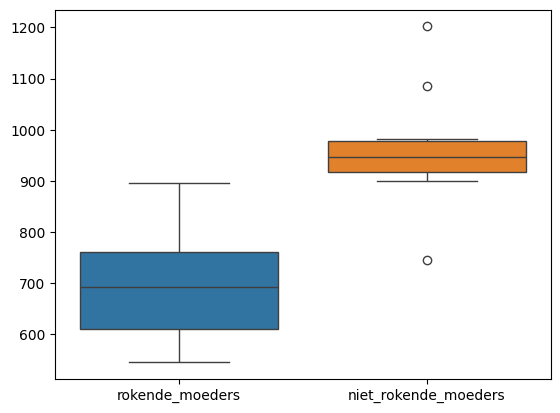

In [4]:
#Plot deelvraag 7
moeders = pd.DataFrame(data={'rokende_moeders' :[621, 793, 593, 545, 753, 655, 895, 767, 714, 598, 693],
'niet_rokende_moeders' : [947, 945, 1086, 1202, 973, 981, 930, 745, 903, 899, 961]})

sns.boxplot(data=moeders)

In [5]:
niet_rokende_meer_dan_1000 = sum(1 for hoeveelheid in niet_rokende_moeders if hoeveelheid > 1000)
print("Aantal niet-rokende moeders met meer dan 1000 ml moedermelk:", niet_rokende_meer_dan_1000)

Aantal niet-rokende moeders met meer dan 1000 ml moedermelk: 2


In [6]:
def detect_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [value for value in data if value < lower_bound or value > upper_bound]
    return outliers

niet_rokende_outliers = detect_outliers(niet_rokende_moeders)
print("Aantal outliers bij niet-rokende moeders:", len(niet_rokende_outliers))

Aantal outliers bij niet-rokende moeders: 3


### Antwoord vraag 7

1. (Genereer de plot hierboven in een codecel. Geef duidelijk aan dat de plot bij deze deelvraag hoort!)

2. two-sample t-test (The t-test for independent samples)

3.
- $H_0: \mu_1 - \mu_2 = 0$ (beide moeders zouden evenveel moedermelk moeten produceren)
- $H_1: \mu_1 - \mu_2 < 0$ (de niet rokende moeders zouden meer moedermelk produceren dan de rokende moeders)

4. p-waarde=6.312035087270153e-06
5. de p waarde is extreem klein dus we kunnen de hypothese verwerpen
6.


----

# Vraag 8 [5 pt] -> paired t-test t-test voor paired samples

Een limonadefabrikant wil zijn limonadeblikjes een nieuw uiterlijk geven. Daartoe laat hij een testpanel van 180 potentiële klanten de aantrekkelijkheid van het oude en het nieuwe blikje beoordelen en ondervraagt hij hen over de bereidheid om het oude en het nieuwe blikje te kopen. De aantrekkelijkheid wordt beoordeeld op een schaal van 1 tot en met 7, met 1 de laagste en 7 de hoogste aantrekkelijkheid.  
We willen weten of de klanten het nieuwe blikje aantrekkelijker vinden dan het oude blikje. De data staat in limonadeblikjes.csv.  
(1) Welke toets moet je gebruiken om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!  
(2) Formuleer de nulhypothese en de alternatieve hypothese  
(3) Bereken de p-waarde  
(4) Trek een besluit op basis van de vorige stap en beantwoord de onderzoeksvraag.   
(5) In de cursus kwam Cohen's d aan bod om de effectgrootte te berekenen. Er bestaan echter veel alternatieven. Één van die alternatieven is Glass' Δ
$$\Delta = \frac{\overline{x}_1 - \overline{x}_2}{s_1}$$
met $\overline{x}_1$ en $\overline{x}_2$ het gemiddelde van elke groep en $s_1$ de standaard deviatie van de eerste sample.  
Bereken Glass' $\Delta$.  

In [ ]:
df = pd.read_csv('../dsai-ReeksA/limonadeblikjes.csv',sep=';')
df.head()

In [ ]:
stats.ttest_rel(df["aantrekkelijkheid_oud"], df["aantrekkelijkheid_nieuw"], alternative='less')

In [ ]:
def cohen_d(a, b):
    na = len(a)
    nb = len(b)
    pooled_sd = np.sqrt( ((na-1) * a.std(ddof=1)**2 +
                          (nb-1) * b.std(ddof=1)**2) / (na + nb - 2) )
    return (b.mean() - a.mean()) / pooled_sd

In [ ]:
print(cohen_d(df["aantrekkelijkheid_oud"], df["aantrekkelijkheid_nieuw"]))

## Antwoorden Vraag 8

(8.1)   Je gebruikt de t-test voor paired samples

(8.2)  The hypotheses are:

- $H_0$: $\mu_1 - \mu_2 = 0$ (De aantrekkelijkheid van de blikjes is hetzelfde in beide groepen)
- $H_1$: $\mu_1 - \mu_2 < 0$ (De aantrekkelijkheid is significant groter bij de nieuwe blikjes vergeleken met de oude blikjes)

(8.3)  de p-waarde is =1.3231562068750385e-07

(8.4)  De aantrekkelijkheid van de nieuwe blikjes is significant groter vergeleken met de aantrekkelijkheid van de oude blikjes. Zelfs bij een significantieniveau van 0.01 kan je de H0 rejecten of weigeren.

(8.5)  Glass' $\Delta$ = 0.2916637362306984
